# Plot colorbar with discrete colors

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
from scipy.signal.windows import gaussian
# import plotly.express as px


## Categorial values 
Usage: land use

### Set up test data

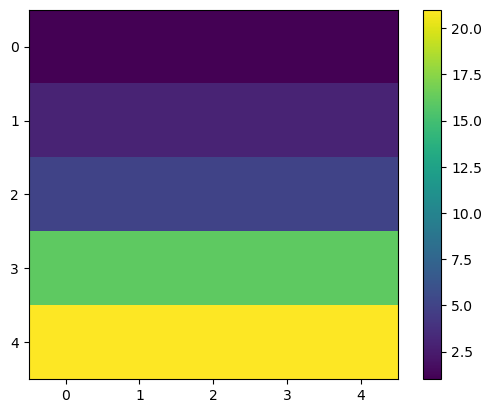

In [2]:

vals = np.array([1,3,5,16,21])
iswater = 16

data = np.zeros((5,5))
for i, val in enumerate(vals):
    data[i,:] = val
plt.imshow(data)
plt.colorbar()


In [3]:
print(vals)

rgbs = mpl.cm.viridis(np.linspace(0,1,len(vals)+1))
rgbs 

[ 1  3  5 16 21]


array([[0.267004, 0.004874, 0.329415, 1.      ],
       [0.253935, 0.265254, 0.529983, 1.      ],
       [0.163625, 0.471133, 0.558148, 1.      ],
       [0.134692, 0.658636, 0.517649, 1.      ],
       [0.477504, 0.821444, 0.318195, 1.      ],
       [0.993248, 0.906157, 0.143936, 1.      ]])

(0.0, 1.0, 1.0)
[[0.267004 0.004874 0.329415 1.      ]
 [0.253935 0.265254 0.529983 1.      ]
 [0.163625 0.471133 0.558148 1.      ]
 [0.       1.       1.       1.      ]
 [0.477504 0.821444 0.318195 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]


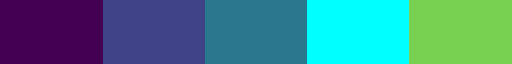

In [4]:
print(mpl.colors.to_rgb('cyan')) 

idx = np.where(vals==iswater)[0][0]
rgbs[idx,:] = list(mpl.colors.to_rgb('cyan')) + [1]
print(rgbs)

cmap = mpl.colors.ListedColormap(rgbs[:-1]).with_extremes(over=rgbs[-1])
cmap

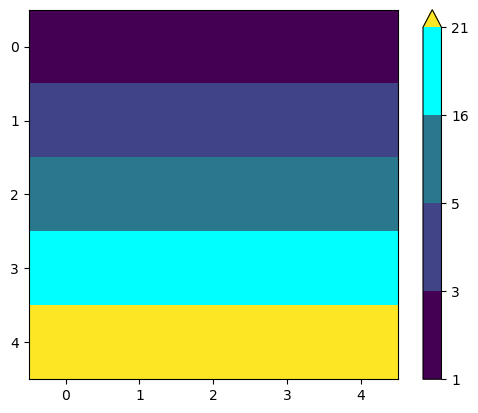

In [5]:
norm = mpl.colors.BoundaryNorm(vals,cmap.N, extend='max')
plt.imshow(data, cmap=cmap, norm=norm)
plt.colorbar()

## Continuous field with categorical thresholds
Usage: QVA, precipitation

[ 0.2  2.   5.  10. ]
['#a0d2ff', '#ff9900', '#ff2800', '#aa00aa']


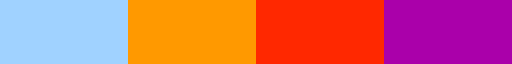

In [6]:
# Example from QVA

thresholds = np.array([0.2,2,5,10])
print(thresholds)

colors_rgb= [
    [160,210,255], # blue
    [255,153,0], # orange
    [255,40,0], # red
    [170,0,170], # purple
]
colors = [mpl.colors.to_hex(np.array(rgb)/255) for rgb in colors_rgb]
print(colors )

cmap = mpl.colors.ListedColormap(colors)
cmap 


### Set up test data

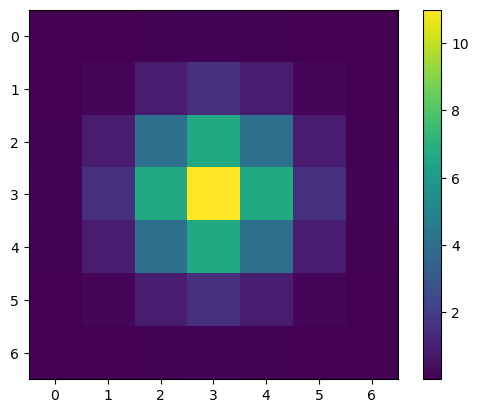

In [7]:

N = 7   # kernel size
k1d = gaussian(N, std=1).reshape(N, 1)
kernel = np.outer(k1d, k1d)*11.

plt.imshow(kernel)
plt.colorbar()

Mask below 0.1 with NaN

[[        nan         nan         nan  0.12219896         nan         nan
          nan]
 [        nan  0.20147203  0.90293498  1.48868812  0.90293498  0.20147203
          nan]
 [        nan  0.90293498  4.04667385  6.67183726  4.04667385  0.90293498
          nan]
 [ 0.12219896  1.48868812  6.67183726 11.          6.67183726  1.48868812
   0.12219896]
 [        nan  0.90293498  4.04667385  6.67183726  4.04667385  0.90293498
          nan]
 [        nan  0.20147203  0.90293498  1.48868812  0.90293498  0.20147203
          nan]
 [        nan         nan         nan  0.12219896         nan         nan
          nan]]


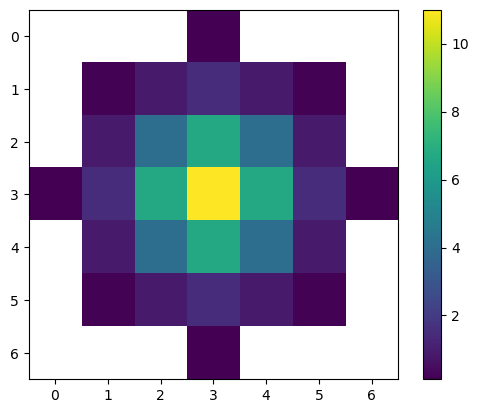

In [8]:
# kernel_m1 = np.ma.masked_where(kernel<0.1, kernel)
kernel_m1 = np.where(kernel<0.1, np.nan, kernel)
print(kernel_m1)

plt.imshow(kernel_m1)
plt.colorbar()

Mask below 0.2 with NaN

[[        nan         nan         nan         nan         nan         nan
          nan]
 [        nan  0.20147203  0.90293498  1.48868812  0.90293498  0.20147203
          nan]
 [        nan  0.90293498  4.04667385  6.67183726  4.04667385  0.90293498
          nan]
 [        nan  1.48868812  6.67183726 11.          6.67183726  1.48868812
          nan]
 [        nan  0.90293498  4.04667385  6.67183726  4.04667385  0.90293498
          nan]
 [        nan  0.20147203  0.90293498  1.48868812  0.90293498  0.20147203
          nan]
 [        nan         nan         nan         nan         nan         nan
          nan]]


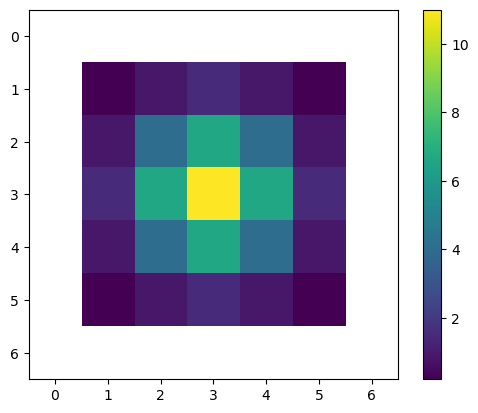

In [9]:
# kernel_m1 = np.ma.masked_where(kernel<0.1, kernel)
kernel_m2 = np.where(kernel<thresholds[0], np.nan, kernel)
print(kernel_m2)

plt.imshow(kernel_m2)
plt.colorbar()

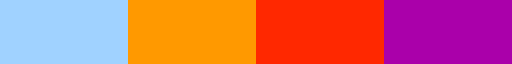

In [10]:
cmap = mpl.colors.ListedColormap(colors)
cmap 

without the `extend=max` option, the colorbar will not show the color for the pre-to-last value (red)

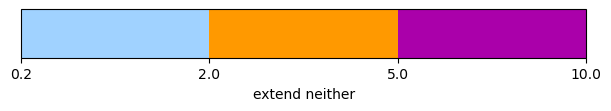

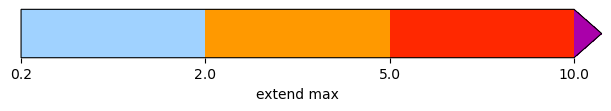

In [11]:
norm = mpl.colors.BoundaryNorm(thresholds,cmap.N)

fig, ax = plt.subplots(figsize=(6, 1), layout='constrained')
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), 
             cax=ax, orientation='horizontal', label='extend neither')

norm = mpl.colors.BoundaryNorm(thresholds,cmap.N, extend='max')

fig, ax = plt.subplots(figsize=(6, 1), layout='constrained')
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), 
             cax=ax, orientation='horizontal', label='extend max')


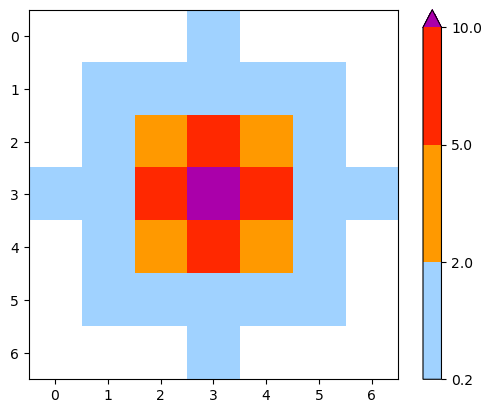

In [12]:
plt.imshow(kernel_m1, cmap=cmap, norm=norm)
plt.colorbar()

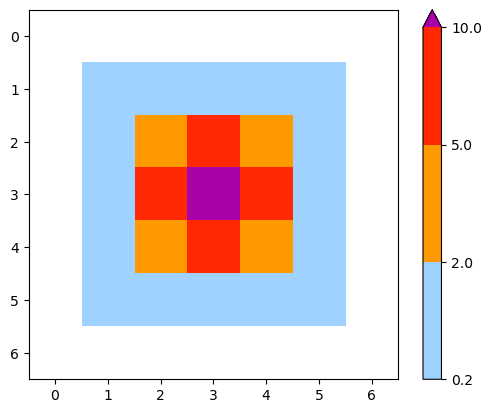

In [13]:
plt.imshow(kernel_m2, cmap=cmap, norm=norm)
plt.colorbar()

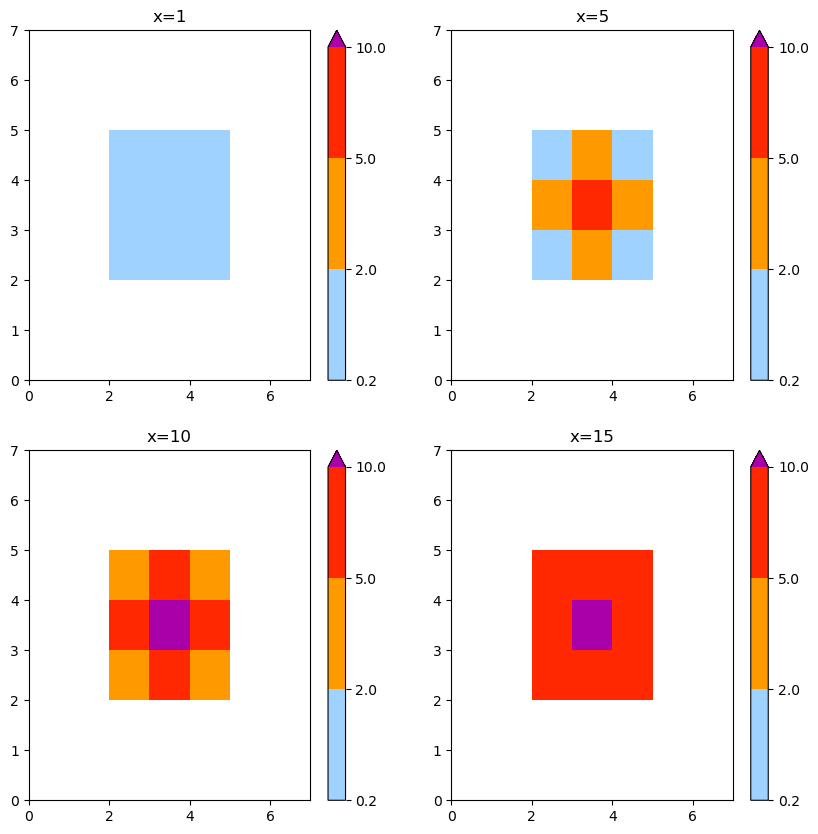

In [14]:
kernel = np.outer(k1d, k1d)
kernel_m2 = np.where(kernel<thresholds[0], np.nan, kernel)

fig, axs = plt.subplots(2,2, figsize=(10,10))
i = 0
for x in [1,5,10,15]:
    ax = axs.flatten()[i]
    p1 = ax.pcolormesh(kernel_m2*x, cmap=cmap, norm=norm)
    plt.colorbar(p1, ax=ax)
    ax.set_title(f'x={x}')
    i+=1


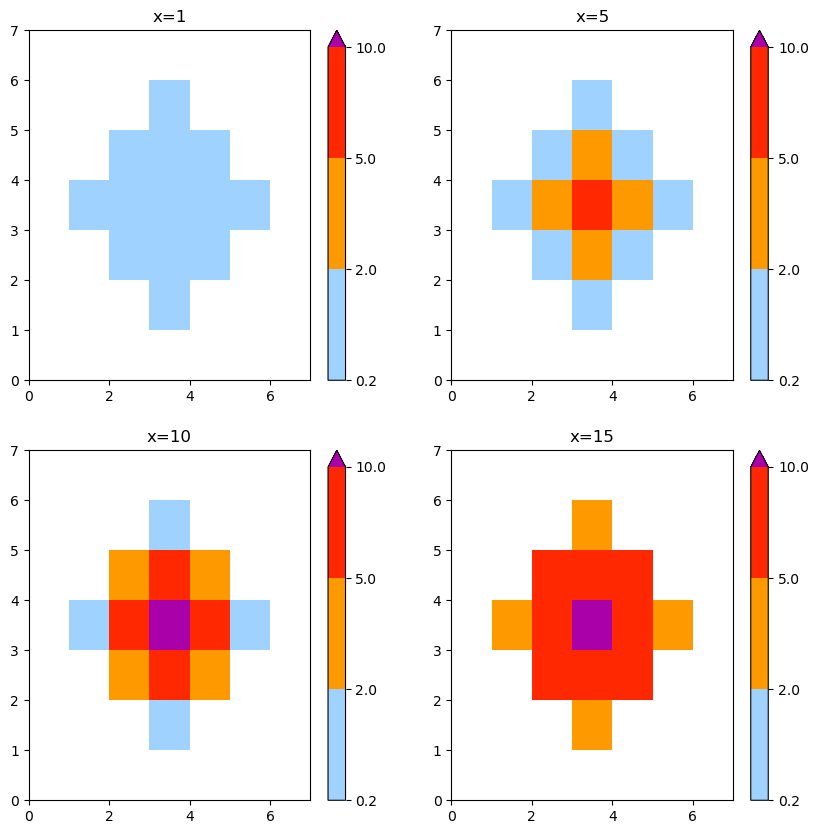

In [15]:
kernel = np.outer(k1d, k1d)
kernel_m1 = np.where(kernel<0.1, np.nan, kernel)

fig, axs = plt.subplots(2,2, figsize=(10,10))
i = 0
for x in [1,5,10,15]:
    ax = axs.flatten()[i]
    p1 = ax.pcolormesh(kernel_m1*x, cmap=cmap, norm=norm)
    plt.colorbar(p1, ax=ax)
    ax.set_title(f'x={x}')
    i+=1
